### Pandas Dataframes 

Dataframes are tabular data structures supported in python from the pandas library. Pandas library also supports  Series which are vector or array like 1 dimensional data structures while Dataframes are more like a collection of series or 2 dimensional data structures. Dataframes store collections of heterogeneous records. They can be created in different ways.
Pandas is the most widely used data manipulation library in puthon and it also includes various powerful operations on the supported data structures.


#### Creating DataFrames 

We need to import pandas to use data frames as our first step.


In [1]:
import pandas as pd

To create DataFrames we need data and corresponding labels on raw and columns. Raw labels are also  known as index.
Following is the simplest DataFrame we create 


In [23]:
df = pd.DataFrame()

In [25]:
df.columns

Index([], dtype='object')

In [26]:
df.index

Index([], dtype='object')

Lets use a random set of 10 numbers to create a DataFrame. We'll use random package to get set of numbers.

In [27]:
import random

In [30]:
data = [random.randint(1,10) for i in range(10)]

In [34]:
df = pd.DataFrame(data, columns=['data'], index=range(10))

In [35]:
df.head()

,data
0,4
1,3
2,8
3,7
4,8


####  Operations on Dataframe 

We can apply arithmatic , logical, selection and projection operations on Dataframes. We can also add new raws and columns to the existing DataFrames

In [37]:
df['more_columns']=5

In [40]:
df

,data,more_columns
0,4,5
1,3,5
2,8,5
3,7,5
4,8,5
5,10,5
6,4,5
7,4,5
8,8,5
9,8,5


In [41]:
df*2

,data,more_columns
0,8,10
1,6,10
2,16,10
3,14,10
4,16,10
5,20,10
6,8,10
7,8,10
8,16,10
9,16,10


In [42]:
df['label'] = 'random data'

In [43]:
df

,data,more_columns,label
0,4,5,random data
1,3,5,random data
2,8,5,random data
3,7,5,random data
4,8,5,random data
5,10,5,random data
6,4,5,random data
7,4,5,random data
8,8,5,random data
9,8,5,random data


In [44]:
df*4

,data,more_columns,label
0,16,20,random datarandom datarandom datarandom data
1,12,20,random datarandom datarandom datarandom data
2,32,20,random datarandom datarandom datarandom data
3,28,20,random datarandom datarandom datarandom data
4,32,20,random datarandom datarandom datarandom data
5,40,20,random datarandom datarandom datarandom data
6,16,20,random datarandom datarandom datarandom data
7,16,20,random datarandom datarandom datarandom data
8,32,20,random datarandom datarandom datarandom data
9,32,20,random datarandom datarandom datarandom data


In [45]:
import datetime as dt 
d = dt.datetime.now()

In [46]:
df['date'] = d

In [53]:
df[4:8]

,data,more_columns,label,date
4,8,5,random data,2022-10-08 15:09:38.849040
5,10,5,random data,2022-10-08 15:09:38.849040
6,4,5,random data,2022-10-08 15:09:38.849040
7,4,5,random data,2022-10-08 15:09:38.849040


In [48]:
df*4

TypeError: cannot perform __mul__ with this index type: DatetimeArray

In [2]:
def calculate_monthly_records(principal_amount = 1000000, num_years=30,annual_interest_rate_perc=4):
    annual_interest_rate= annual_interest_rate_perc/100
    num_months = 12*num_years
    monthly_ineterest_rate = annual_interest_rate/12
    record = { 'month': 0 ,'remaining_payment_amount': principal_amount , 'interest_payment':0, 
              'principal_payment':0 ,
                  'EMI':0, 
                  'monthly_ineterest_rate':monthly_ineterest_rate}
    print(record)
    all_records = []
    all_records.append(record)
    for i in range(1, num_months+1):
        new_rec = dict()
        new_rec['month'] = i
        new_rec['interest_payment'] = record['remaining_payment_amount']*monthly_ineterest_rate
        multiplier = (1/(1+monthly_ineterest_rate ))
        principal_amount=record['remaining_payment_amount']
        remaining_months = num_months-i
        EMI= ((1-multiplier) / (multiplier-multiplier**(remaining_months+2)))*principal_amount
        new_rec['principal_payment'] = EMI-new_rec['interest_payment'] 
        new_rec['remaining_payment_amount']= record['remaining_payment_amount']-new_rec['principal_payment']
        new_rec['EMI'] = EMI
        new_rec['monthly_ineterest_rate']=monthly_ineterest_rate
        record = new_rec
        all_records.append(record)
    return pd.DataFrame(all_records)

In [19]:
interest_df = calculate_monthly_records(num_years=20, annual_interest_rate_perc=2.5).sort_values('month')

{'month': 0, 'remaining_payment_amount': 1000000, 'interest_payment': 0, 'principal_payment': 0, 'EMI': 0, 'monthly_ineterest_rate': 0.0020833333333333333}


In [20]:
interest_df

,month,remaining_payment_amount,interest_payment,principal_payment,EMI,monthly_ineterest_rate
0,0,1.000000e+06,0.000000,0.000000,0.00000,0.002083
1,1,9.967843e+05,2083.333333,3215.695597,5299.02893,0.002083
2,2,9.935619e+05,2076.633968,3222.394963,5299.02893,0.002083
3,3,9.903328e+05,2069.920645,3229.108286,5299.02893,0.002083
4,4,9.870970e+05,2063.193336,3235.835595,5299.02893,0.002083
...,...,...,...,...,...,...
236,236,2.108618e+04,54.854899,5244.174031,5299.02893,0.002083
237,237,1.583108e+04,43.929537,5255.099394,5299.02893,0.002083
238,238,1.056503e+04,32.981413,5266.047517,5299.02893,0.002083
239,239,5.288012e+03,22.010481,5277.018450,5299.02893,0.002083


<AxesSubplot:xlabel='month', ylabel='interest_payment'>

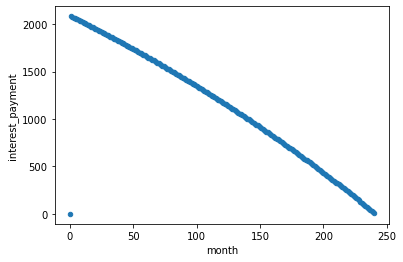

In [21]:
interest_df.plot('month', 'interest_payment', kind ='scatter')

In [ ]:
#pd.DataFrame(all_records)

In [ ]:
# all_records1 = []

# for i in range(1, num_months+1):
#     new_rec = dict()
#     new_rec['month'] = i
#     new_rec['interest_payment'] = record['remaining_payment_amount']*monthly_ineterest_rate
#     new_rec['principal_payment'] = EMI-new_rec['interest_payment'] 
#     new_rec['remaining_payment_amount']= record['remaining_payment_amount']-new_rec['principal_payment']
#     new_rec['EMI'] = EMI
#     new_rec['monthly_ineterest_rate']=monthly_ineterest_rate
#     record = new_rec
#     all_records1.append(record)

In [ ]:
# pd.DataFrame(all_records1)